In [186]:
import pydicom
import matplotlib.pyplot as plt
import numpy as np

In [187]:
# path = "C:/Users/taaha/Downloads/ct_nonequi_tilt/164515-00000014.dcm"
path = "C:/Users/taaha/Downloads/manifest-OtXaMwL56190865641215613043/QIN LUNG CT/QIN-LSC-0055/07-27-2003-1-CT Thorax wo Contrast-86597/5.000000-THORAX WO  3.0  B41 Soft Tissue-77621/1-015.dcm"
path = r'C:\Users\taaha\Downloads\manifest-OtXaMwL56190865641215613043\QIN LUNG CT\R0223\12-05-2001-NA-CT CHEST WITH CONTRAST-15336\2.000000-NA-08982\1-168.dcm'

path = r"C:\Users\taaha\Downloads\1-55.dcm"
path2 = r'C:\Users\taaha\Downloads\1-55 (1).dcm'

d2 = pydicom.read_file(path2)
ds = pydicom.read_file(path)
ds

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.4320.7015.297870584753128030347569672736
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL', 'CT_SOM5 SPI']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.4320.7015.297870584753128030347569672736
(0008, 0020) St

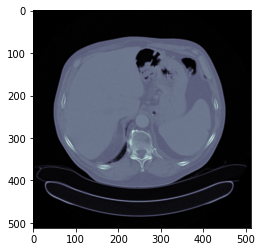

In [195]:
plt.imshow(ds.pixel_array, cmap = plt.cm.bone)

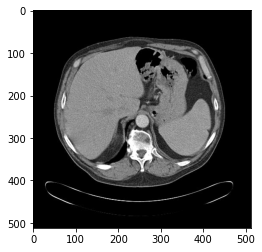

In [189]:
plt.imshow(d2.pixel_array, cmap = 'gray')

In [196]:
print(ds.pixel_array.dtype)
print(d2.pixel_array.dtype)

uint16
uint8


In [192]:
unique = np.unique(ds.pixel_array)
len(unique)

1936

In [193]:
from pydicom import dcmread
from pydicom.data import get_testdata_file
from pydicom.uid import RLELossless

original_size = os.path.getsize(path)

arr = ds.pixel_array
ds.compress(RLELossless, arr, encoding_plugin = 'pylibjpeg')
saved_to = f"C:/Users/taaha/Downloads/rle_ct_dataset/164515-00000014.dcm"
ds.save_as(saved_to)

size = os.path.getsize(saved_to)
print(original_size, size)
ratio = original_size / size
print(ratio)


527382 271230
1.9444088043358037


In [194]:
import io
from pydicom.encaps import encapsulate
from pydicom.dataset import Dataset
from pydicom.uid import JPEGExtended
from PIL import Image

def ensure_even(stream):
    # Very important for some viewers
    if len(stream) % 2:
        return stream + b"\x00"
    return stream

image = Image.fromarray(ds.pixel_array, mode = 'I;16')

output = io.BytesIO()
image.save(output, format="JPEG")

# encapsulate() requires a list of bytes, one item per frame
ds.PixelData = encapsulate([ensure_even(output.getvalue())])
# Need to set this flag to indicate the Pixel Data is compressed
ds['PixelData'].is_undefined_length = True  # Only needed for < v1.4
ds.PhotometricInterpretation = "YBR_FULL_422"
ds.file_meta.TransferSyntaxUID = JPEGExtended

ds.save_as("output-jpeg.dcm", write_like_original=False)

OSError: cannot write mode I;16 as JPEG